In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [31]:
df=pd.read_csv('Wholesale+Customers+Data.csv')

In [32]:
df["TOTALSPENT"]=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [33]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TOTALSPENT
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [6]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TOTALSPENT
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [7]:
ct = pd.crosstab(df['Channel'],df['Region'],values = df['TOTALSPENT'],aggfunc='sum')
ct

Region,Lisbon,Oporto,Other
Channel,,,
Hotel,1538342,719150,5742077
Retail,848471,835938,4935522


In [35]:
devtomean = np.std(df)/np.mean(df)
devtomean

Buyer/Spender       0.576040
Fresh               1.052720
Milk                1.271851
Grocery             1.193815
Frozen              1.578536
Detergents_Paper    1.652766
Delicatessen        1.847304
TOTALSPENT          0.792338
dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


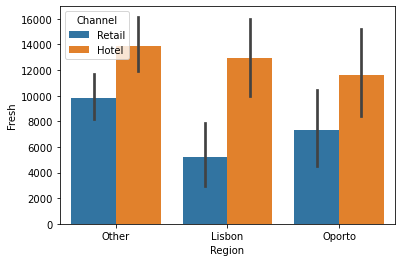

In [8]:
sns.barplot(df['Region'],df['Fresh'],hue=df['Channel']);

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


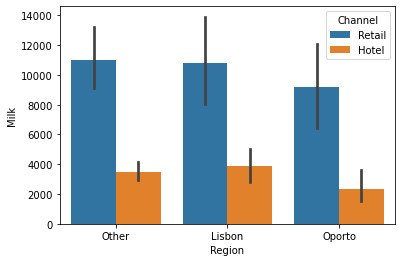

In [12]:
sns.barplot(df['Region'],df['Milk'],hue=df['Channel']);

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


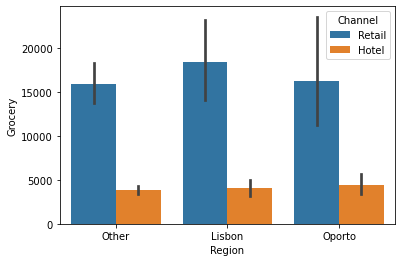

In [13]:
sns.barplot(df['Region'],df['Grocery'],hue=df['Channel']);

In [19]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen', 'TOTALSPENT'],
      dtype='object')

In [31]:
pd.pivot_table(df,'Detergents_Paper',['Region', 'Channel'],aggfunc='sum',margins=True)                                     

Detergents_Paper
Region Channel                  
Lisbon Hotel               56081
       Retail             148055
Oporto Hotel               13516
       Retail             159795
Other  Hotel              165990
       Retail             724420
All                      1267857

In [32]:
pd.pivot_table(df,'Delicatessen',['Region', 'Channel'],aggfunc='sum',margins=True)                                     

Delicatessen
Region Channel              
Lisbon Hotel           70632
       Retail          33695
Oporto Hotel           30965
       Retail          23541
Other  Hotel          320358
       Retail         191752
All                   670943

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


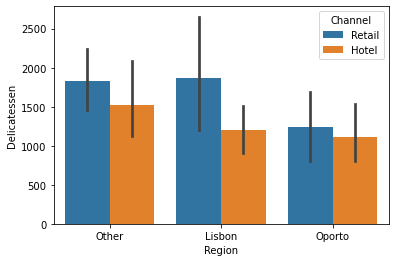

In [39]:
sns.barplot(df['Region'],df['Delicatessen'],hue=df['Channel']);

<AxesSubplot:ylabel='Fresh'>

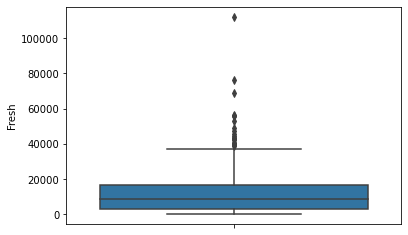

In [54]:
sns.boxplot(y=df['Fresh'])

<AxesSubplot:ylabel='Milk'>

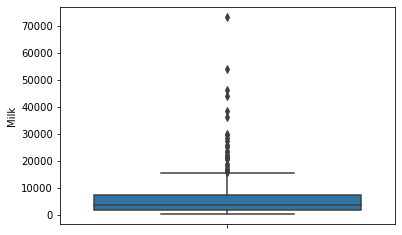

In [55]:
# 'Region', 'Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen'
sns.boxplot(y=df['Milk'])

<AxesSubplot:ylabel='Grocery'>

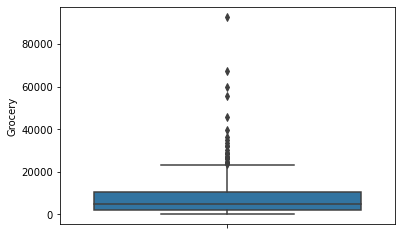

In [56]:
sns.boxplot(y=df['Grocery'])

<AxesSubplot:ylabel='Frozen'>

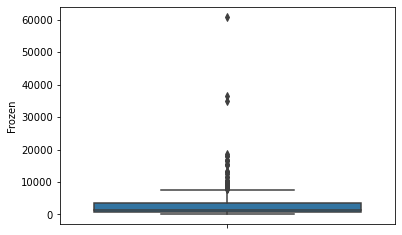

In [59]:
sns.boxplot(y=df['Frozen'])

<AxesSubplot:ylabel='Detergents_Paper'>

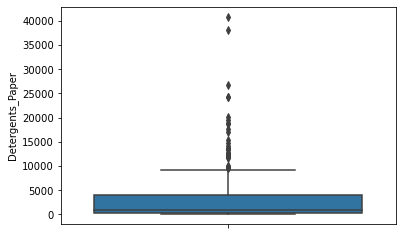

In [60]:
sns.boxplot(y=df['Detergents_Paper'])

<AxesSubplot:ylabel='Delicatessen'>

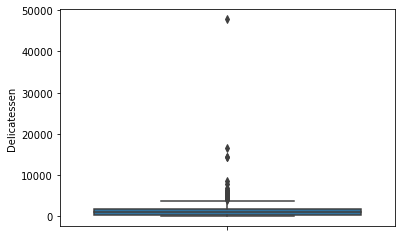

In [61]:
sns.boxplot(y=df['Delicatessen'])

In [63]:
df1=pd.read_csv('Survey-1.csv')

In [64]:
df1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [65]:
df1.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [67]:
ct1=pd.crosstab(df1['Gender'],df1['Major'])
ct1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [68]:
ct2=pd.crosstab(df1['Gender'],df1['Grad Intention'])
ct2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [69]:
ct3=pd.crosstab(df1['Gender'],df1['Employment'])
ct3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [70]:
ct4=pd.crosstab(df1['Gender'],df1['Computer'])
ct4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [76]:
df1['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [77]:
29/63

0.4603174603174603

In [87]:
df1['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [119]:
df0 = df1[df1['Grad Intention'] != 'Undecided']

In [121]:
CT = pd.crosstab(df0['Gender'],df0['Grad Intention'])
CT

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [122]:
df1["GPA"].describe()

count    40.000000
mean      3.100000
std       0.386304
min       2.400000
25%       2.875000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64

In [124]:
z=(3-3.10)/0.386304
z

-0.258863485752154

In [125]:
stats.norm.cdf(-0.258863)

0.39787047351882815

In [130]:
dfm=df1[df1['Salary']>=50]

In [131]:
dfm['Gender'].value_counts()

Male      10
Female    10
Name: Gender, dtype: int64

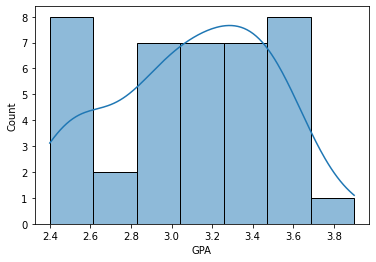

In [139]:
sns.histplot(df1['GPA'], kde = True);

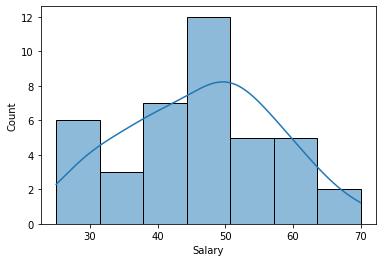

In [140]:
sns.histplot(df1['Salary'], kde = True);

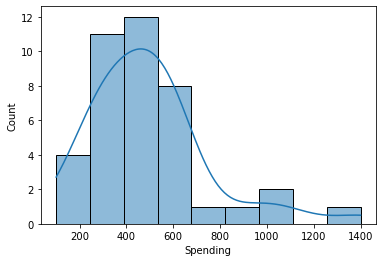

In [141]:
sns.histplot(df1['Spending'], kde = True);

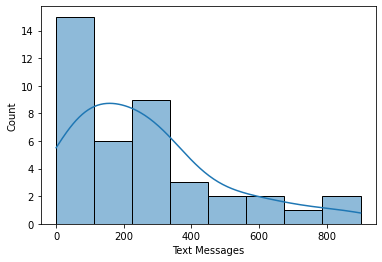

In [142]:
sns.histplot(df1['Text Messages'], kde = True);

In [146]:
#H0 = data is normally distributed
#H1 = data is not normally distributed

stats.shapiro(df1['Salary'])

ShapiroResult(statistic=0.9689891934394836, pvalue=0.33416980504989624)

In [147]:
#H0 = data is normally distributed
#H1 = data is not normally distributed

stats.shapiro(df1['GPA'])

ShapiroResult(statistic=0.953252375125885, pvalue=0.09815297275781631)

In [148]:
#H0 = data is normally distributed
#H1 = data is not normally distributed

stats.shapiro(df1['Spending'])

ShapiroResult(statistic=0.8724251985549927, pvalue=0.00033097428968176246)

In [149]:
#H0 = data is normally distributed
#H1 = data is not normally distributed

stats.shapiro(df1['Text Messages'])

ShapiroResult(statistic=0.8824034929275513, pvalue=0.0006114590214565396)

In [3]:
df2 = pd.read_csv('A+&+B+shingles.csv')
df2

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [4]:
df2.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [19]:
stats.ttest_1samp(df2['A'],0.35,alternative='greater')

Ttest_1sampResult(statistic=-1.4735046253382782, pvalue=0.9252236685509249)

In [17]:
df3=df2['B']
df4=df3.dropna(inplace=True)
df3

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
Name: B, dtype: float64

In [22]:
stats.ttest_1samp(df3,0.35,alternative='greater')

Ttest_1sampResult(statistic=-3.1003313069986995, pvalue=0.9979095225996808)

In [23]:
df2

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [28]:
stats.ttest_ind(df2['A'],df2['B'],nan_policy='omit', alternative ='two-sided')

Ttest_indResult(statistic=1.2896282719661123, pvalue=0.2017496571835306)